In [30]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [31]:
APAP_POX_traj1=pt.iterload('APAP_POX_0-300ns_strip.nc','APAP_POX_strip.parm7')
APAP_POX_traj2=pt.iterload('APAP_POX_rep2_strip.nc','APAP_POX_strip.parm7') 
APAP_POX_traj3=pt.iterload('APAP_POX_rep3_strip.nc','APAP_POX_strip.parm7')
MAA_POX_traj1=pt.iterload('MAA_POX_0-300ns_strip.nc','MAA_POX_strip.parm7')
MAA_POX_traj2=pt.iterload('MAA_POX_rep2_strip.nc','MAA_POX_strip.parm7')
AA_POX_traj1=pt.iterload('4-AA_POX_strip.nc','4-AA_POX_strip.parm7')
AA_POX_traj2=pt.iterload('4-AA_rep2_strip.nc','4-AA_POX_strip.parm7')
AM404_POX_traj1=pt.iterload('AM404_POX_0-300ns_strip.nc','AM404_POX_strip.parm7')
AM404_POX_traj2=pt.iterload('AM404_POX_rep2_strip.nc','AM404_POX_strip.parm7')

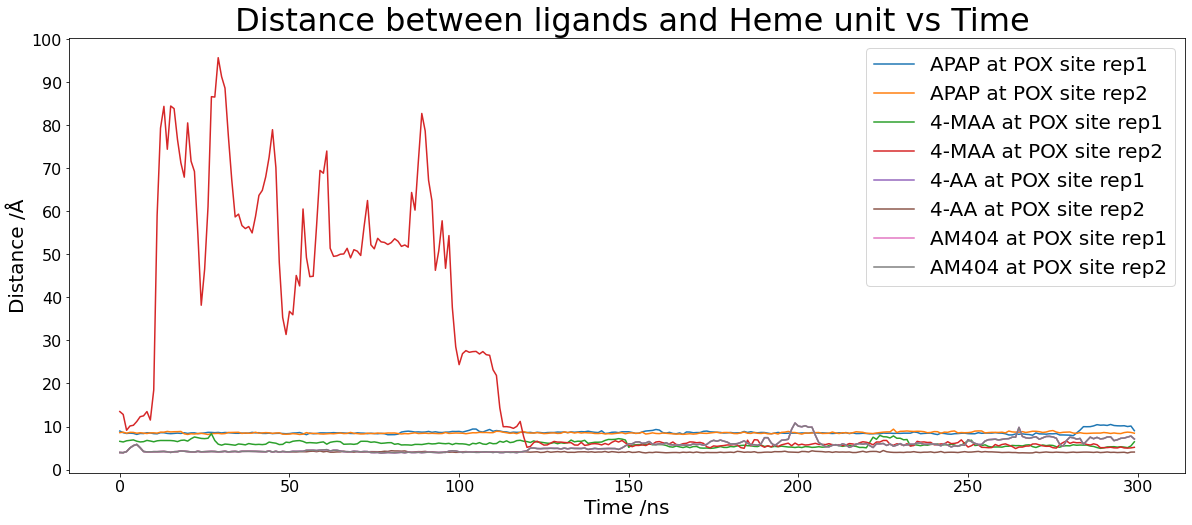

In [29]:
dist1 = pt.distance(APAP_POX_traj1, ':1 :553')
plt.figure(figsize = (20,8))
plt.plot(np.mean(dist1.reshape(300,20), axis=1),label="APAP at POX site rep1")
dist2 = pt.distance(APAP_POX_traj2, ':1 :553')
plt.plot(np.mean(dist2.reshape(300,20), axis=1),label="APAP at POX site rep2")
dist3 = pt.distance(MAA_POX_traj1, ':1 :553')
plt.plot(np.mean(dist3.reshape(300,20), axis=1),label="4-MAA at POX site rep1")
dist4 = pt.distance(MAA_POX_traj2, ':1 :553')
plt.plot(np.mean(dist4.reshape(300,20), axis=1),label="4-MAA at POX site rep2")
dist5 = pt.distance(AA_POX_traj1, ':1 :553')
plt.plot(np.mean(dist5.reshape(300,20), axis=1),label="4-AA at POX site rep1")
dist6 = pt.distance(AA_POX_traj2, ':1 :553')
plt.plot(np.mean(dist6.reshape(300,20), axis=1),label="4-AA at POX site rep2")
dist7 = pt.distance(AM404_POX_traj1, ':1 :553')
plt.plot(np.mean(dist5.reshape(300,20), axis=1),label="AM404 at POX site rep1")
dist8 = pt.distance(AM404_POX_traj2, ':1 :553')
plt.plot(np.mean(dist5.reshape(300,20), axis=1),label="AM404 at POX site rep2")



plt.xlabel('Time /ns',fontsize=20)
plt.ylabel('Distance /Å',fontsize=20)
plt.title(' Distance between ligands and Heme unit vs Time',fontsize=32)
plt.legend(loc='upper right',prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(range(0,101,10),fontsize=16)
plt.savefig("dist_POX.png",dpi=400,bbox_inches='tight')

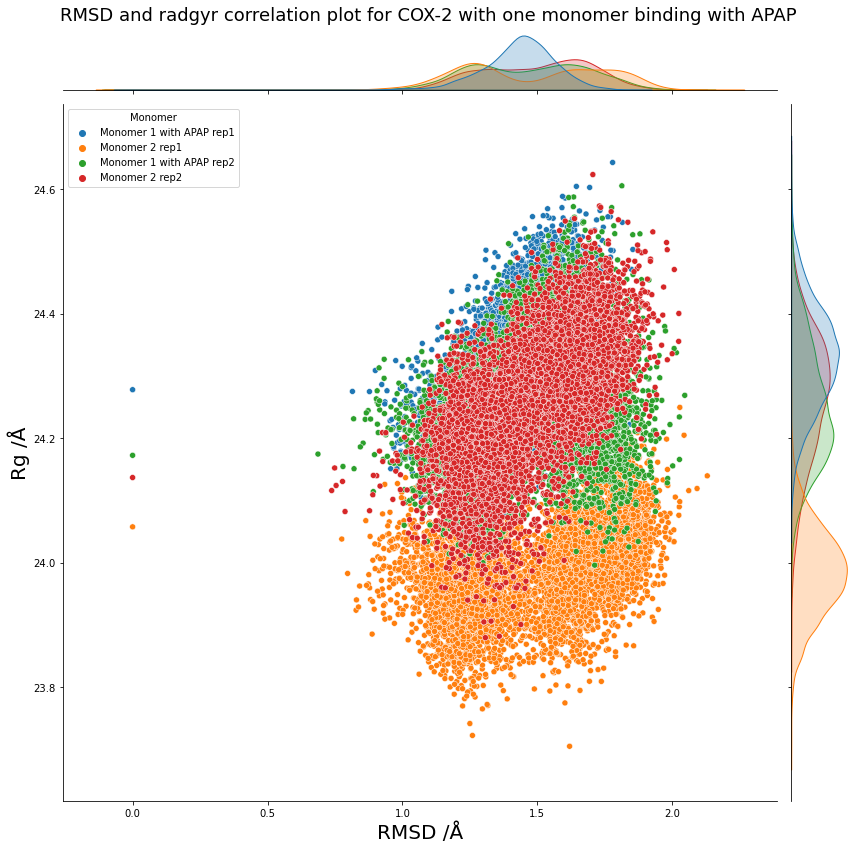

In [43]:
rmsd_APAP_m1 = pt.rmsd(APAP_POX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_APAP_m2 = pt.rmsd(APAP_POX_traj1,ref=0, mask=':556-1109@C,N,O')
rg_dimer1 = pt.radgyr(APAP_POX_traj1, mask=':2-555')
rg_dimer2 = pt.radgyr(APAP_POX_traj1, mask=':556-1109')
rmsd_APAP2_m1 = pt.rmsd(APAP_POX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_APAP2_m2 = pt.rmsd(APAP_POX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_2_dimer1 = pt.radgyr(APAP_POX_traj2, mask=':2-555')
rg_2_dimer2 = pt.radgyr(APAP_POX_traj2, mask=':556-1109')
df1 = pd.DataFrame({'RMSD /Å': rmsd_APAP_m1, 'Rg /Å':rg_dimer1, 'Monomer': 'Monomer 1 with APAP rep1'}, index=[np.arange(0,6000)])
df2 = pd.DataFrame({'RMSD /Å': rmsd_APAP_m2, 'Rg /Å':rg_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(6000,12000)])
df3 = pd.DataFrame({'RMSD /Å': rmsd_APAP2_m1, 'Rg /Å':rg_2_dimer1, 'Monomer': 'Monomer 1 with APAP rep2'}, index=[np.arange(12000,18000)])
df4 = pd.DataFrame({'RMSD /Å': rmsd_APAP2_m2, 'Rg /Å':rg_2_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(18000,24000)])
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with APAP",fontsize=18)
h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("APAP.png",dpi=400)

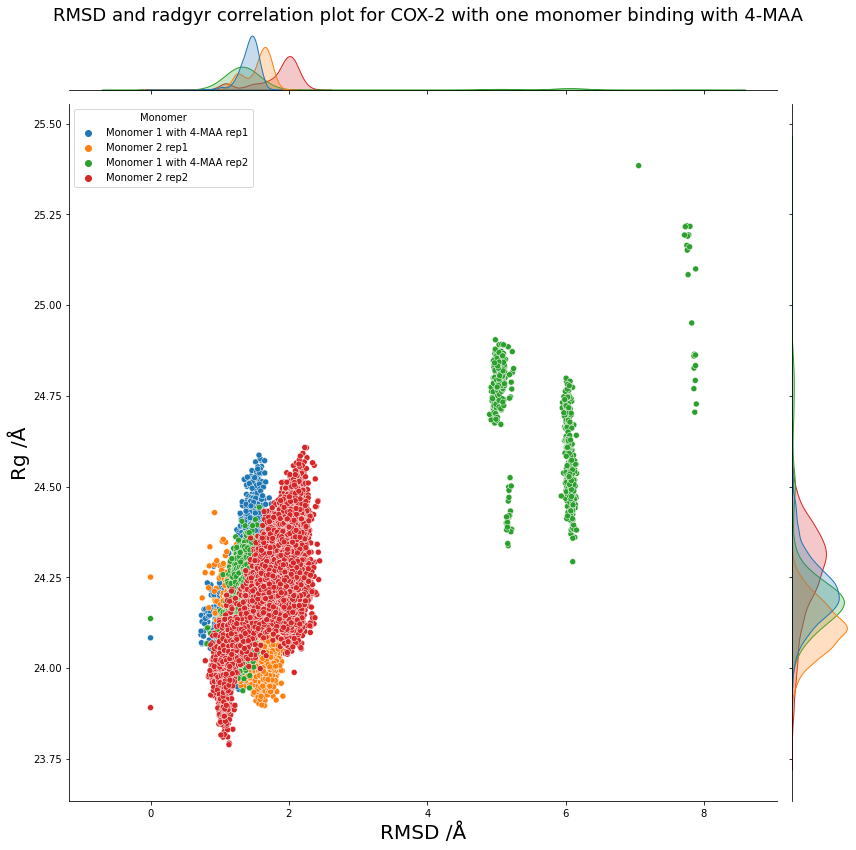

In [44]:
rmsd_MAA_m1 = pt.rmsd(MAA_POX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_MAA_m2 = pt.rmsd(MAA_POX_traj1,ref=0, mask=':556-1109@C,N,O')
rg__MAA_dimer1 = pt.radgyr(MAA_POX_traj1, mask=':2-555')
rg__MAA_dimer2 = pt.radgyr(MAA_POX_traj1, mask=':556-1109')
rmsd_MAA2_m1 = pt.rmsd(MAA_POX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_MAA2_m2 = pt.rmsd(MAA_POX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_MAA2_dimer1 = pt.radgyr(MAA_POX_traj2, mask=':2-555')
rg_MAA2_dimer2 = pt.radgyr(MAA_POX_traj2, mask=':556-1109')
df5 = pd.DataFrame({'RMSD /Å': rmsd_MAA_m1, 'Rg /Å':rg__MAA_dimer1, 'Monomer': 'Monomer 1 with 4-MAA rep1'}, index=[np.arange(24000,30000)])
df6 = pd.DataFrame({'RMSD /Å': rmsd_MAA_m2, 'Rg /Å':rg__MAA_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(30000,36000)])
df7 = pd.DataFrame({'RMSD /Å': rmsd_MAA2_m1, 'Rg /Å':rg_MAA2_dimer1, 'Monomer': 'Monomer 1 with 4-MAA rep2'}, index=[np.arange(36000,42000)])
df8 = pd.DataFrame({'RMSD /Å': rmsd_MAA2_m2, 'Rg /Å':rg_MAA2_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(42000,48000)])
frames = [df5, df6, df7, df8]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with 4-MAA",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("4-MAA.png",dpi=400)

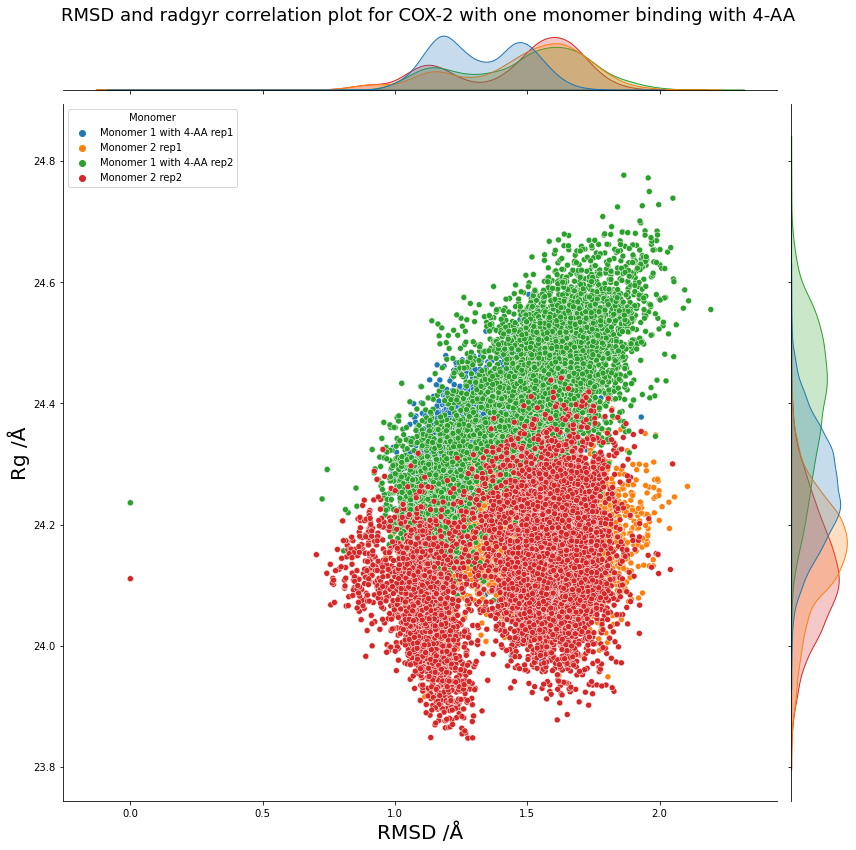

In [45]:
rmsd_AA_m1 = pt.rmsd(AA_POX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_AA_m2 = pt.rmsd(AA_POX_traj1,ref=0, mask=':556-1109@C,N,O')
rg_AA_dimer1 = pt.radgyr(AA_POX_traj1, mask=':2-555')
rg_AA_dimer2 = pt.radgyr(AA_POX_traj1, mask=':556-1109')
rmsd_AA2_m1 = pt.rmsd(AA_POX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_AA2_m2 = pt.rmsd(AA_POX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_AA2_dimer1 = pt.radgyr(AA_POX_traj2, mask=':2-555')
rg_AA2_dimer2 = pt.radgyr(AA_POX_traj2, mask=':556-1109')
df9 = pd.DataFrame({'RMSD /Å': rmsd_AA_m1, 'Rg /Å':rg_AA_dimer1, 'Monomer': 'Monomer 1 with 4-AA rep1'}, index=[np.arange(48000,54000)])
df10 = pd.DataFrame({'RMSD /Å': rmsd_AA_m2, 'Rg /Å':rg_AA_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(54000,60000)])
df11 = pd.DataFrame({'RMSD /Å': rmsd_AA2_m1, 'Rg /Å':rg_AA2_dimer1, 'Monomer': 'Monomer 1 with 4-AA rep2'}, index=[np.arange(60000,66000)])
df12 = pd.DataFrame({'RMSD /Å': rmsd_AA2_m2, 'Rg /Å':rg_AA2_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(66000,72000)])
frames = [df9, df10, df11, df12]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with 4-AA",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("4-AA.png",dpi=400)

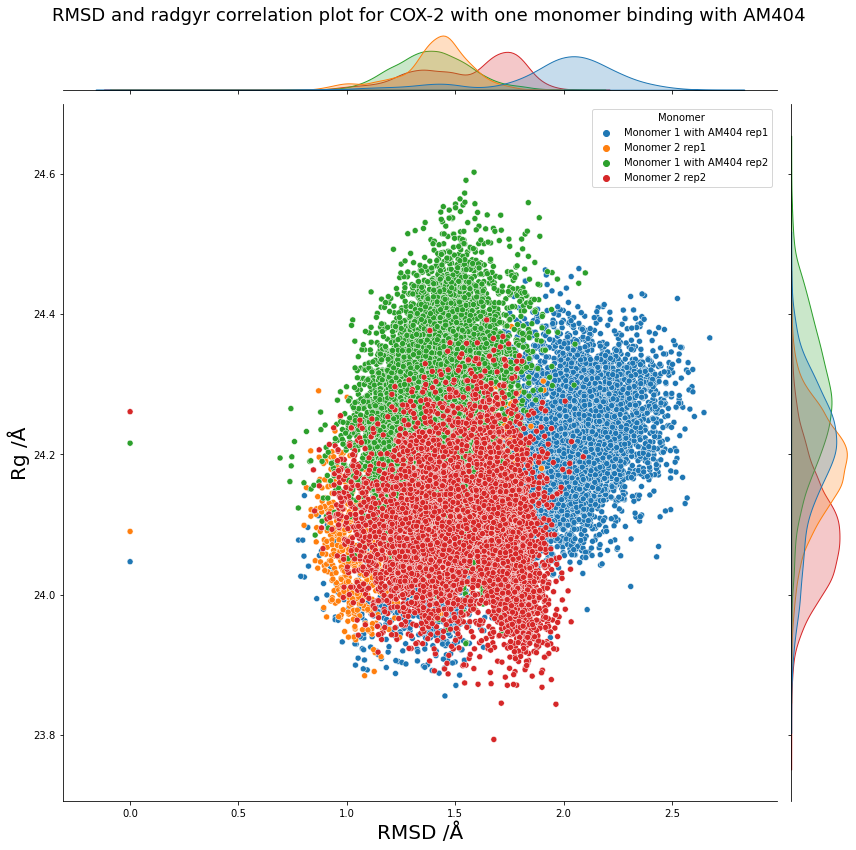

In [27]:
rmsd_AM404_m1 = pt.rmsd(AM404_POX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_AM404_m2 = pt.rmsd(AM404_POX_traj1,ref=0, mask=':556-1109@C,N,O')
rg_A4_dimer1 = pt.radgyr(AM404_POX_traj1, mask=':2-555')
rg_A4_dimer2 = pt.radgyr(AM404_POX_traj1, mask=':556-1109')
rmsd_A42_m1 = pt.rmsd(AM404_POX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_A42_m2 = pt.rmsd(AM404_POX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_A42_dimer1 = pt.radgyr(AM404_POX_traj2, mask=':2-555')
rg_A42_dimer2 = pt.radgyr(AM404_POX_traj2, mask=':556-1109')
df13 = pd.DataFrame({'RMSD /Å': rmsd_AM404_m1, 'Rg /Å':rg_A4_dimer1, 'Monomer': 'Monomer 1 with AM404 rep1'}, index=[np.arange(72000,78000)])
df14 = pd.DataFrame({'RMSD /Å': rmsd_AM404_m2, 'Rg /Å':rg_A4_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(78000,84000)])
df15 = pd.DataFrame({'RMSD /Å': rmsd_A42_m1, 'Rg /Å':rg_A42_dimer1, 'Monomer': 'Monomer 1 with AM404 rep2'}, index=[np.arange(84000,90000)])
df16 = pd.DataFrame({'RMSD /Å': rmsd_A42_m2, 'Rg /Å':rg_A42_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(90000,96000)])
frames = [df13, df14, df15, df16]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with AM404",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("AM404.png",dpi=400)

In [46]:
pt.superpose(APAP_POX_traj1, ref=0)
pt.superpose(APAP_POX_traj2, ref=0)
pt.superpose(MAA_POX_traj1, ref=0)
pt.superpose(MAA_POX_traj2, ref=0)
pt.superpose(AA_POX_traj1, ref=0)
pt.superpose(AA_POX_traj2, ref=0)
pt.superpose(AM404_POX_traj1, ref=0)
pt.superpose(AM404_POX_traj2, ref=0)


APAP_COX_rmsf1=pt.rmsf(traj= APAP_POX_traj1[int(len(APAP_POX_traj1)*0.75):],mask='byres')   
V_M1_1=APAP_COX_rmsf1[1:554]
V_M2_1=APAP_COX_rmsf1[554:]
APAP_COX_rmsf1_stack=np.vstack((V_M1_1.T[1],V_M2_1.T[1]))
print (APAP_COX_rmsf1_stack)
APAP_COX_rmsf2=pt.rmsf(traj= APAP_POX_traj2[int(len(APAP_POX_traj2)*0.75):],mask='byres')   
V_M1_2=APAP_COX_rmsf2[1:554]
V_M2_2=APAP_COX_rmsf2[554:]
APAP_COX_rmsf2_stack=np.vstack((V_M1_2.T[1],V_M2_2.T[1]))
print (APAP_COX_rmsf2_stack)

MAA_rmsf1=pt.rmsf(traj= MAA_POX_traj1[int(len(MAA_POX_traj1)*0.75):],mask='byres')   
MAA_M1_1=MAA_rmsf1[1:554]
MAA_M2_1=MAA_rmsf1[554:]
MAA_rmsf1_stack=np.vstack((MAA_M1_1.T[1],MAA_M2_1.T[1]))
print (MAA_rmsf1_stack)
MAA_rmsf2=pt.rmsf(traj= MAA_POX_traj2[int(len(MAA_POX_traj2)*0.75):],mask='byres')   
MAA_M1_2=MAA_rmsf2[1:554]
MAA_M2_2=MAA_rmsf2[554:]
MAA_rmsf2_stack=np.vstack((MAA_M1_2.T[1],MAA_M2_2.T[1]))
print (MAA_rmsf2_stack)

AA_rmsf1=pt.rmsf(traj= AA_POX_traj1[int(len(AA_POX_traj1)*0.75):],mask='byres')   
AA_M1_1=AA_rmsf1[1:554]
AA_M2_1=AA_rmsf1[554:]

AA_rmsf2=pt.rmsf(traj= AA_POX_traj2[int(len(AA_POX_traj2)*0.75):],mask='byres')     
AA_M1_2=AA_rmsf2[1:554]
AA_M2_2=AA_rmsf2[554:]


AM404_rmsf1=AM404_rmsf1=pt.rmsf(traj= AM404_POX_traj1[int(len(AM404_POX_traj1)*0.75):],mask='byres')   
AM404_M1_1=AM404_rmsf1[1:554]
AM404_M2_1=AM404_rmsf1[554:]
AM404_rmsf1_stack=np.vstack((AM404_M1_1.T[1],AM404_M2_1.T[1]))
print (AM404_rmsf1_stack)
AM404_rmsf2=AM404_rmsf2=pt.rmsf(traj= AM404_POX_traj2[int(len(AM404_POX_traj2)*0.75):],mask='byres')   
AM404_M1_2=AM404_rmsf2[1:554]
AM404_M2_2=AM404_rmsf2[554:]
AM404_rmsf2_stack=np.vstack((AM404_M1_2.T[1],AM404_M2_2.T[1]))
print (AM404_rmsf2_stack)

[[1.39740229 1.33490697 1.06100221 ... 1.30999822 0.88585565 0.56728922]
 [1.8084163  1.14661792 0.80077337 ... 1.27483437 0.76204545 0.52005699]]
[[1.39568759 1.31514429 0.8811462  ... 1.53431958 0.80940315 0.54677406]
 [1.70217275 1.6238594  0.92547988 ... 1.27031707 0.87922504 0.5524158 ]]
[[1.63763133 1.4882202  1.08200419 ... 1.3451193  0.97141366 0.59235536]
 [1.75752686 1.67365709 1.16010654 ... 1.32992116 0.88691438 0.5622021 ]]
[[1.70171347 1.59594177 0.92342218 ... 1.20378356 0.87471023 0.5414306 ]
 [1.42324383 1.25863744 0.87323283 ... 1.5348839  0.93554004 0.58490191]]
[[1.75844641 1.71259624 1.07727525 ... 1.30440862 0.94257252 0.57539759]
 [1.2408982  1.19234387 0.84709756 ... 1.28876047 0.99284238 0.61323531]]
[[1.39340171 1.29110818 0.91694128 ... 1.34585423 0.99300335 0.6551905 ]
 [1.61814439 1.09120066 0.79422875 ... 1.26889152 1.14340995 0.65728784]]


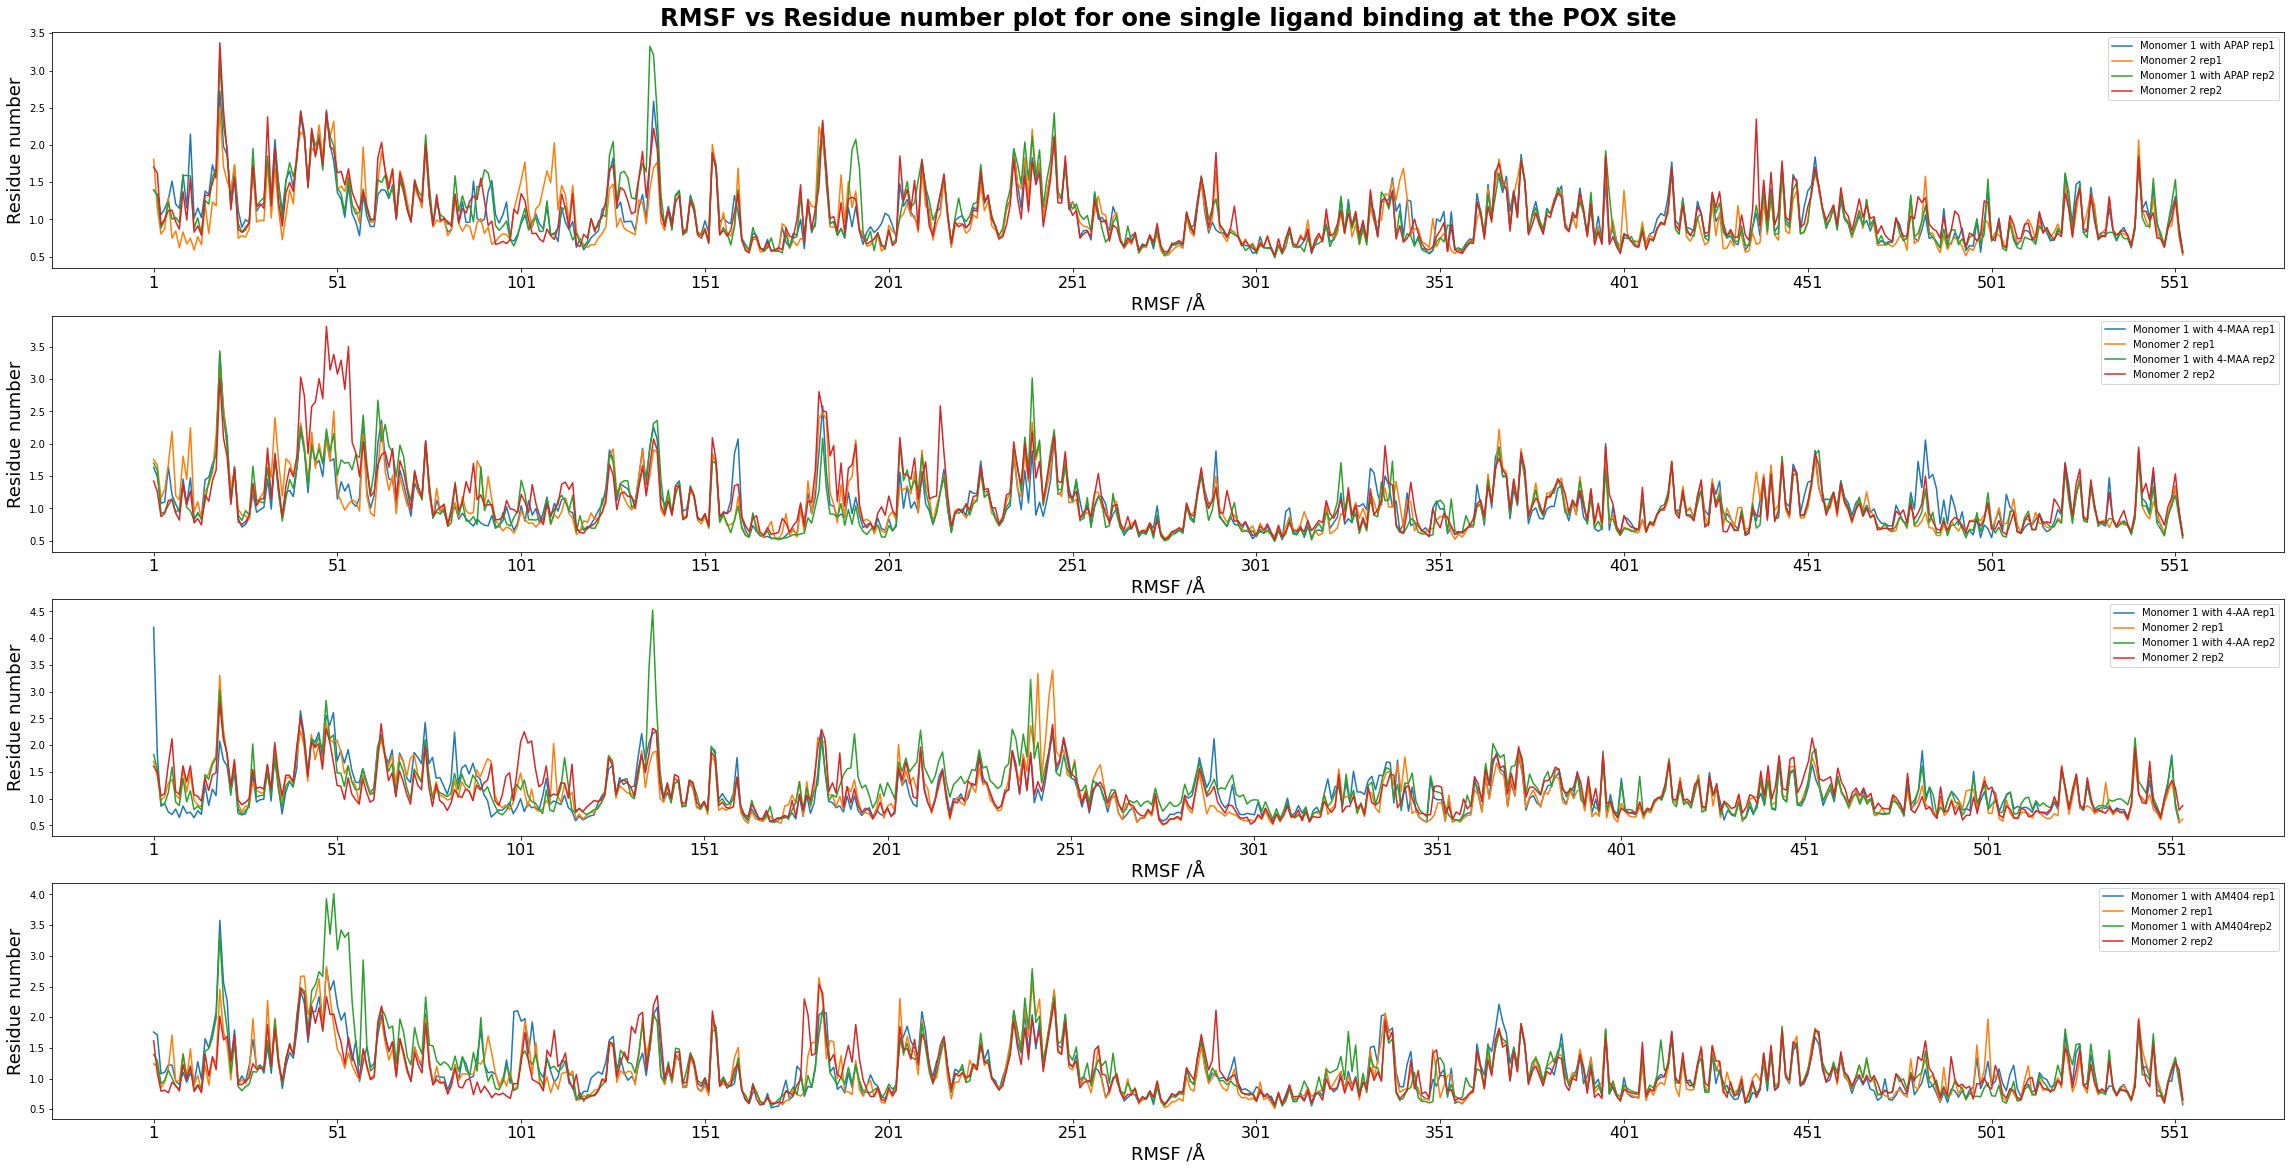

In [47]:
fig, axs = plt.subplots(4, figsize=(40,20))

res_seq=np.array(range(1,554))
axs[0].plot(res_seq,V_M1_1.T[1],label= "Monomer 1 with APAP rep1")
axs[0].plot(res_seq,V_M2_1.T[1],label= "Monomer 2 rep1")
axs[0].plot(res_seq,V_M1_2.T[1],label= "Monomer 1 with APAP rep2")
axs[0].plot(res_seq,V_M2_2.T[1],label= "Monomer 2 rep2")
axs[0].legend(loc='upper right')
axs[0].set_xticks(range(1,554,50)) 
axs[0].set_xticklabels(range(1,554,50), fontsize=16)



axs[1].plot(res_seq,MAA_M1_1.T[1],label= "Monomer 1 with 4-MAA rep1")
axs[1].plot(res_seq,MAA_M2_1.T[1],label= "Monomer 2 rep1")
axs[1].plot(res_seq,MAA_M1_2.T[1],label= "Monomer 1 with 4-MAA rep2")
axs[1].plot(res_seq,MAA_M2_2.T[1],label= "Monomer 2 rep2")
axs[1].legend(loc='upper right')
axs[1].set_xticks(range(1,554,50)) 
axs[1].set_xticklabels(range(1,554,50),fontsize=16)


res=np.array(range(1,555))
axs[2].plot(res_seq,AA_M1_1.T[1],label= "Monomer 1 with 4-AA rep1")
axs[2].plot(res,AA_M2_1.T[1],label= "Monomer 2 rep1")
axs[2].plot(res_seq,AA_M1_2.T[1],label= "Monomer 1 with 4-AA rep2")
axs[2].plot(res,AA_M2_2.T[1],label= "Monomer 2 rep2")
axs[2].legend(loc='upper right')
axs[2].set_xticks(range(1,554,50)) 
axs[2].set_xticklabels(range(1,554,50), fontsize=16)

axs[3].plot(res_seq,AM404_M1_1.T[1],label= "Monomer 1 with AM404 rep1")
axs[3].plot(res_seq,AM404_M2_1.T[1],label= "Monomer 2 rep1")
axs[3].plot(res_seq,AM404_M1_2.T[1],label= "Monomer 1 with AM404rep2")
axs[3].plot(res_seq,AM404_M2_2.T[1],label= "Monomer 2 rep2")
axs[3].legend(loc='upper right')
axs[3].set_xticks(range(1,554,50)) 
axs[3].set_xticklabels(range(1,554,50), fontsize=16)

axs[0].set_title('RMSF vs Residue number plot for one single ligand binding at the POX site',fontweight="bold", size=24)


axs[0].set_xlabel('RMSF /Å', fontsize=18)
axs[0].set_ylabel('Residue number',fontsize=18)
axs[1].set_xlabel('RMSF /Å',fontsize=18)
axs[1].set_ylabel('Residue number',fontsize=18)
axs[2].set_xlabel('RMSF /Å',fontsize=18)
axs[2].set_ylabel('Residue number',fontsize=18)
axs[3].set_xlabel('RMSF /Å',fontsize=18)
axs[3].set_ylabel('Residue number',fontsize=18)
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
#plt.rcParams['font.size'] = '16'

#plt.xticks(range(1,554,50),fontsize=30)
#plt.yticks(fontsize=30)
#plt.xlabel('residue sequence',fontsize=34)
#plt.ylabel('RMSF /$\AA$',fontsize=34)
#plt.title('COX-2  RMSF vs Residues', fontdict = {'fontsize' : 54})
#plt.legend(loc='upper right',fontsize=30)

plt.savefig("rmsf_subplot.png",dpi=400,bbox_inches='tight')